In [194]:
import cv2
import matplotlib.pyplot as plt 

In [195]:
image = cv2.imread('output/extracted.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cap = cv2.imread('images/cap.png')
image.shape, cap.shape

((200, 600, 3), (220, 260, 3))

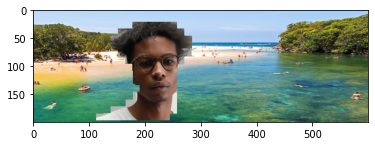

In [196]:
plt.imshow(image[:,:,::-1])

In [197]:
face_cascade = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_default.xml")
faces_coord = face_cascade.detectMultiScale(gray, 1.3, 5)

In [198]:
def draw(img, faces_coord):
    for (x, y, w, h) in faces_coord:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 4)

In [199]:
x,y,w, h = faces_coord[0]
x,y,w,h

(172, 54, 102, 102)

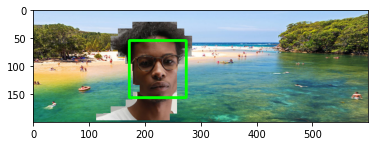

In [200]:
draw(image, faces_coord)
plt.imshow(image[:,:,::-1])

(102, 102, 3)


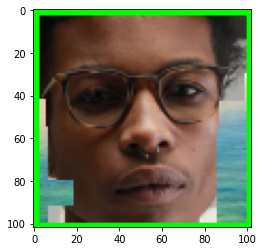

In [201]:
roi = image[54:54+102,172:172+102]
print(roi.shape)
plt.imshow(roi[:,:,::-1])

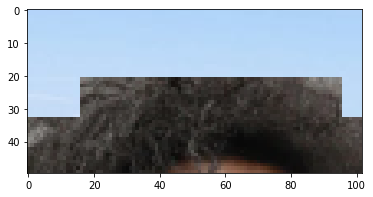

In [202]:
# selecting region of image for cap placement

img_roi = image[0:50, 172-10:172-10+102]
plt.imshow(img_roi[:,:,::-1])

# cap image resizing

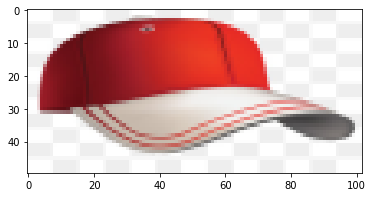

In [203]:
dim = (102, 50)
cap = cv2.resize(cap, dim, interpolation = cv2.INTER_AREA)
plt.imshow(cap[:,:,::-1])

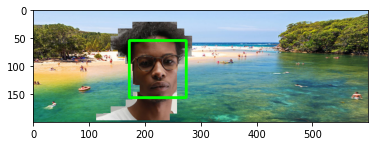

In [204]:
plt.imshow(image[:,:,::-1])

In [205]:
# create a mask of cap and inverted mask also 
img2gray = cv2.cvtColor(cap, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 100, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

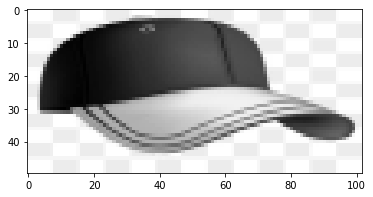

In [206]:
plt.imshow(img2gray, cmap='gray')

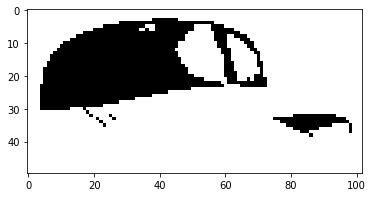

In [207]:
plt.imshow(mask, cmap='gray')

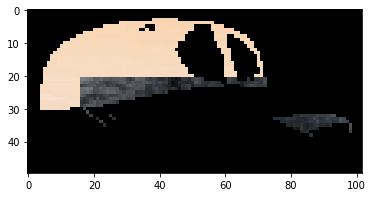

In [208]:
# Now black-out the area of cap in ROI
img1_bg = cv2.bitwise_and(img_roi,img_roi,mask = mask_inv)
plt.imshow(img1_bg)

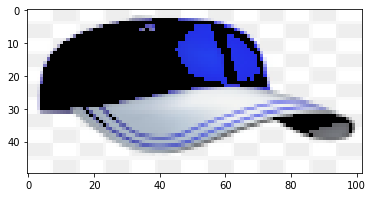

In [209]:
# Take only region of cap from cap image
img2fg = cv2.bitwise_and(cap, cap, mask=mask)
plt.imshow(img2fg)

In [210]:
# put the cap and modify the main image
dst = cv2.add(img1_bg, img2fg)
image[0:50, 172:172+102] = dst

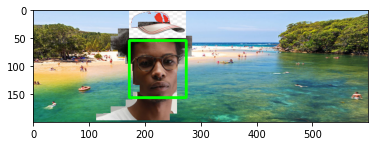

In [211]:
plt.imshow(image[:,:,::-1])